In [38]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [39]:
# Reading the data
dataset = pd.read_csv("Dataset\\finnish.arff.csv")
x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [40]:
dataset.head()

,HW,AR,FP,CO,Effort
0,1,1,1364,10,17778
1,1,1,648,10,8800
2,1,1,1282,10,26670
3,1,1,176,10,1330
4,1,3,627,10,14504


In [41]:
y.shape

(38,)

In [42]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(38,1))
y=scaler.fit_transform(y)

In [43]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=35) 

In [44]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()


regr.fit(X_train,y_train.ravel())
# Predicting the target values of the test set
y_pred=regr.predict(X_test)

 

In [45]:
y.shape

(38, 1)

In [46]:
y_pred=np.reshape(y_pred,(8,1))
y_test=np.reshape(y_test,(8,1))

In [47]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [48]:
# y_pred

In [49]:
# y_test

In [50]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [51]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.011070556671010895

RMSE:
 0.10521671288826169

MAPE:
 74.5299066779692

SMAPE:
 46.85

 Adj R2 score:
 1.0


In [52]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [53]:
y_test=np.reshape(y_test,(8,))
y_pred=np.reshape(y_pred,(8,))

In [54]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

   Actual Effort  Predicted effort
0        17031.0           14568.0
1        14504.0            8800.0
2         2915.0            2240.0
3         1105.0            3008.0
4          796.0            1230.0
5         1750.0            2240.0
6         6030.0            8095.0
7        26670.0           23000.0


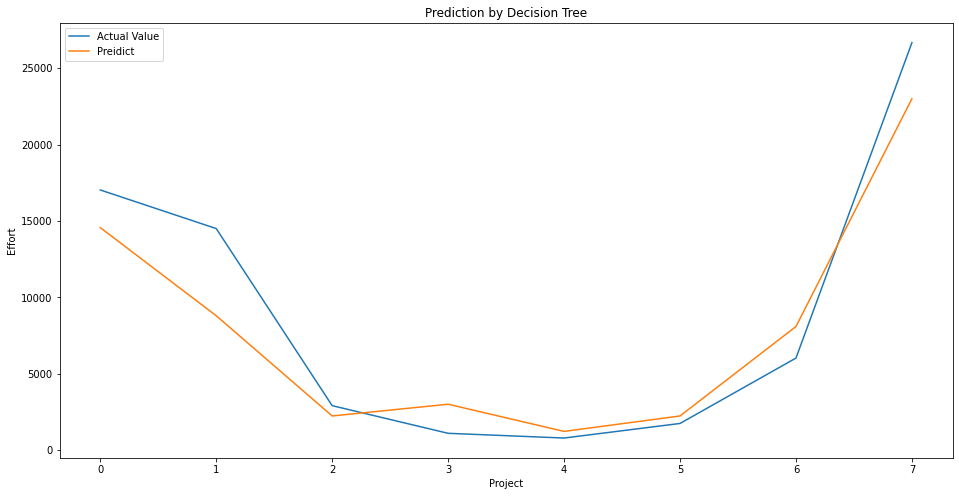

In [56]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Decision Tree")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()